In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
df = pd.read_csv('E:/zoo.csv')

In [12]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
classes = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('animal_name', axis=1).drop('class_type', axis=1), df['class_type'], train_size=0.65)

In [15]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
50,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
56,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0


In [16]:
y_train.head()

50    1
56    2
89    5
97    6
46    7
Name: class_type, dtype: int64

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:


X_test.head()



,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
65,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
11,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [20]:
y_pred = model.predict(X_test)

y_pred



array([1, 2, 1, 1, 4, 2, 2, 3, 1, 7, 6, 4, 3, 1, 1, 6, 2, 2, 1, 2, 1, 2,
       1, 6, 2, 1, 1, 1, 6, 6, 1, 4, 4, 2, 4, 7], dtype=int64)

In [21]:
print(confusion_matrix(y_test, y_pred))

[[13  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  1  2]]


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5
           6       0.80      1.00      0.89         4
           7       1.00      0.67      0.80         3

    accuracy                           0.97        36
   macro avg       0.97      0.94      0.95        36
weighted avg       0.98      0.97      0.97        36



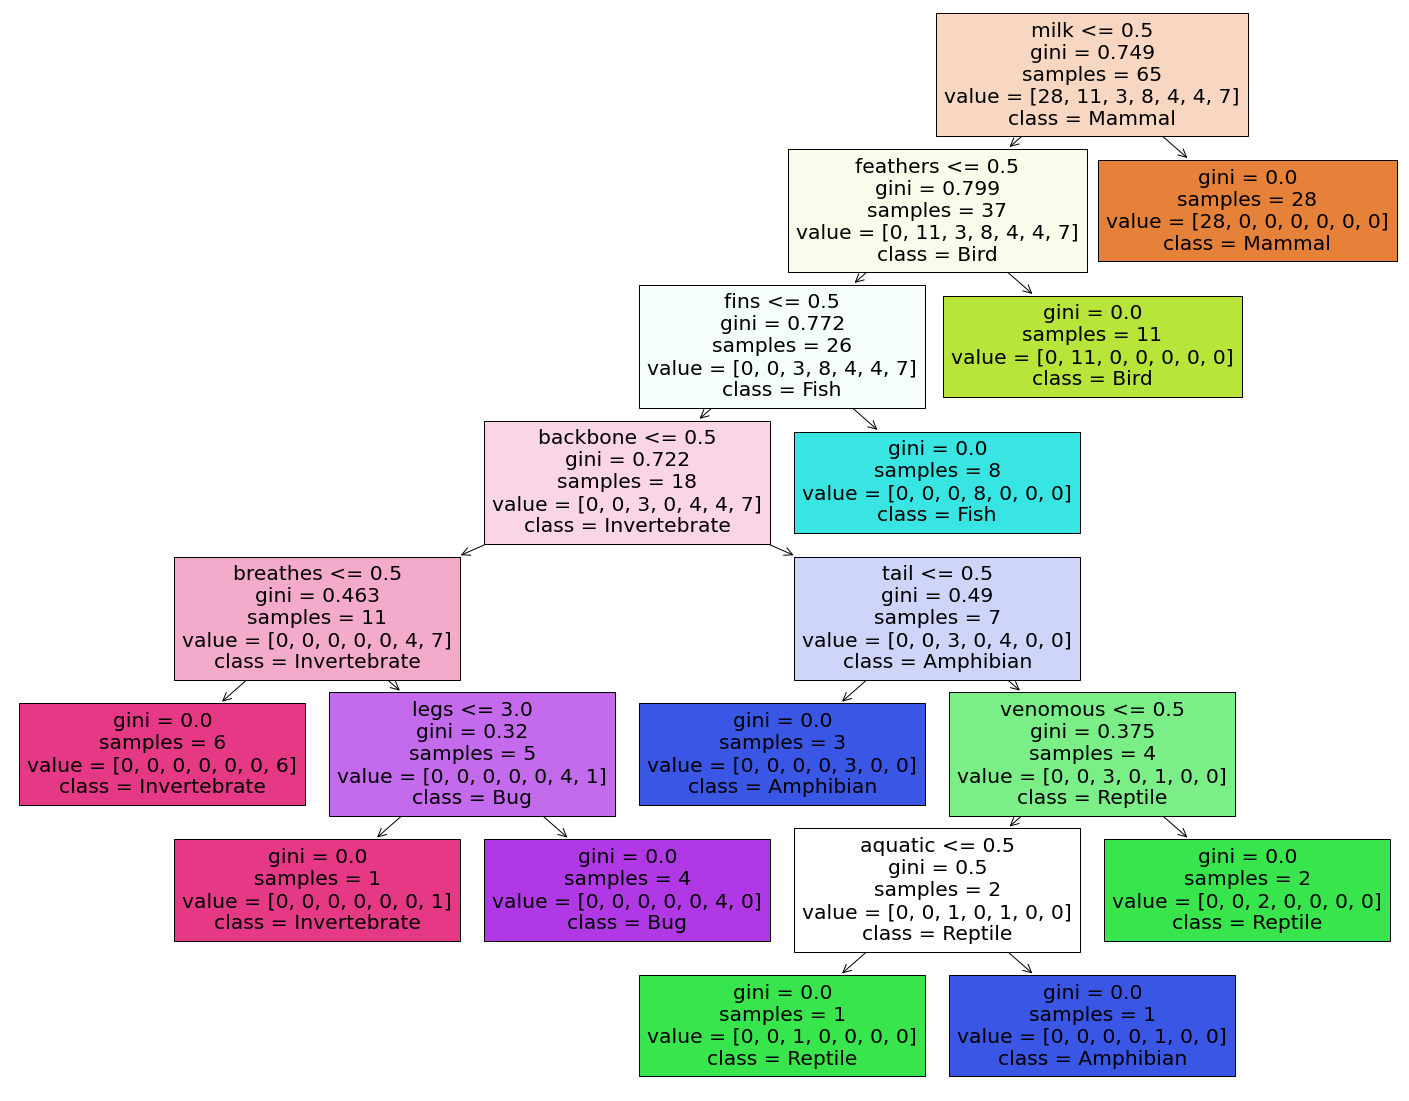

In [25]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, 
                   feature_names=X_train.columns,  
                   class_names=classes,
                   filled=True)